In [1]:
%cd ..

/home/eli/AnacondaProjects/epych


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import collections
import glob
import functools
import logging
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import quantities as pq

import epych
from epych.statistics import alignment, grand

In [4]:
%matplotlib inline

In [5]:
logging.basicConfig(level=logging.INFO)

In [6]:
CONDITIONS = ["go_gloexp", "go_seqctl", "lo_gloexp", "lo_rndctl", "igo_ctl"]
PRETRIAL_SECONDS = 0.5
POSTTRIAL_SECONDS = 0.5

In [7]:
NWB_FILES = glob.glob('/mnt/data/*.nwb')

In [8]:
PILOT_FILES = []

In [9]:
aligner = alignment.AlignmentSummary.unpickle("/mnt/data/mice_passiveglo_visual_alignment")

In [10]:
def initialize_grand_variance(cond, key, signal):
    area = os.path.commonprefix([loc.decode() for loc in signal.channels.location])
    return epych.statistics.grand.GrandVariance(aligner.stats[area], avgs[cond].signals[area])

In [11]:
summaries = {}

In [12]:
for cond in CONDITIONS:
    summaries[cond] = epych.statistic.Summary.unpickle("/mnt/data/mice_passiveglo_grandvariance_%s" % cond, grand.GrandVariance)
    logging.info("Loaded grand mean and variance of LFPs for condition %s" % cond)

INFO:root:Loaded grand mean and variance of LFPs for condition go_gloexp
INFO:root:Loaded grand mean and variance of LFPs for condition go_seqctl
INFO:root:Loaded grand mean and variance of LFPs for condition lo_gloexp
INFO:root:Loaded grand mean and variance of LFPs for condition lo_rndctl
INFO:root:Loaded grand mean and variance of LFPs for condition igo_ctl


In [13]:
ODDBALL_ONSET = -1.9017372477960602e-14
ODDBALL_OFFSET = 0.5004545430388676
events = {
    "Oddball Onset": (ODDBALL_ONSET, 'lightgreen'),
    "Oddball Offset": (ODDBALL_OFFSET, 'red'),
}

In [27]:
def compute_contrast(condl, condr):
    contrast = epych.statistics.grand.summary_t_test(summaries[condl], summaries[condr])
    lfp_diffs, csd_diffs = {}, {}
    for area in sorted(contrast.keys()):
        meanl, meanr = summaries[condl].stats[area].mean, summaries[condr].stats[area].mean
        diff_data = (meanl.data - meanr.data) * (contrast[area][1] < 0.0001)
        lfp_diffs[area] = epych.signals.lfp.EvokedLfp(meanl.channels, diff_data, meanl.dt, meanl.times)

        csdl, csdr = meanl.downsample(4).current_source_density(depth_column="vertical"), meanr.downsample(4).current_source_density(depth_column="vertical")
        diff_data = (csdl.data - csdr.data) * (contrast[area][1][::4, :, :] < 0.0001)
        csd_diffs[area] = epych.signals.lfp.EvokedLfp(meanl.channels[::4], diff_data, meanl.dt, meanl.times)

    lfps = epych.recording.EvokedSampling(epych.recording.empty_intervals(), epych.recording.empty_trials(), epych.recording.default_units(),
                                          **lfp_diffs)
    csds = epych.recording.EvokedSampling(epych.recording.empty_intervals(), epych.recording.empty_trials(), epych.recording.default_units(),
                                          **csd_diffs)
    return contrast, lfps, csds

In [28]:
logo_contrast, logo_lfps, logo_csd = compute_contrast("lo_gloexp", "go_gloexp")

discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b

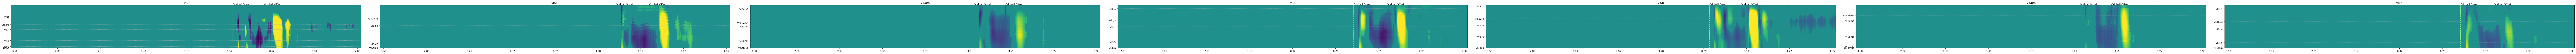

In [29]:
logo_lfps.plot(vmin=-1e-4, vmax=1e-4, figure="mice_passiveglo_visual_logo_lfp.pdf", **events)

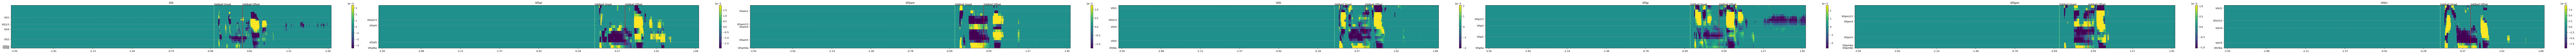

In [30]:
logo_csd.plot(figure="mice_passiveglo_visual_logo_csd.pdf", **events)

In [31]:
go_contrast, go_lfps, go_csd = compute_contrast("go_gloexp", "go_seqctl")

discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b

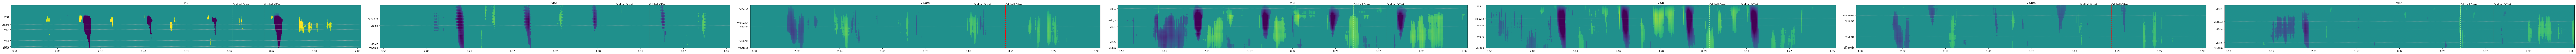

In [32]:
go_lfps.plot(vmin=-1e-4, vmax=1e-4, figure="mice_passiveglo_visual_gocontrast_lfp.pdf", **events)

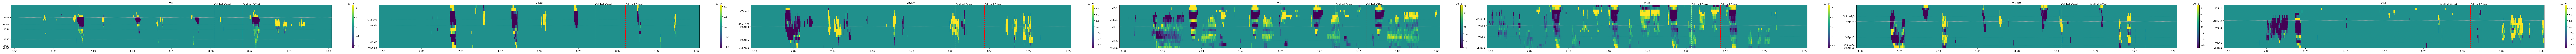

In [33]:
go_csd.plot(figure="mice_passiveglo_visual_gocontrast_csd.pdf", **events)

In [34]:
lo_contrast, lo_lfps, lo_csd = compute_contrast("lo_gloexp", "lo_rndctl")

discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b

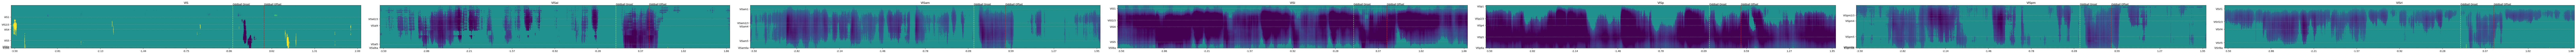

In [35]:
lo_lfps.plot(vmin=-1e-4, vmax=1e-4, figure="mice_passiveglo_visual_locontrast_lfp.pdf", **events)

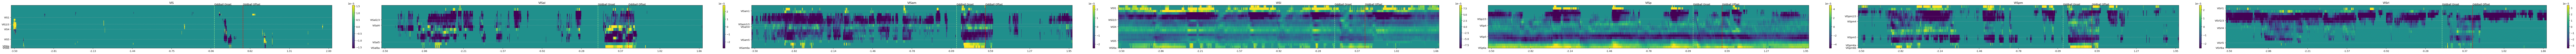

In [36]:
lo_csd.plot(figure="mice_passiveglo_visual_locontrast_csd.pdf", **events)

In [37]:
ssa_contrast, ssa_lfps, ssa_csd = compute_contrast("lo_gloexp", "igo_ctl")

discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b = [ 0.607 1.000 0.607 ],                
a = [ 2.213 ]
discrete filter coefficients: 
b

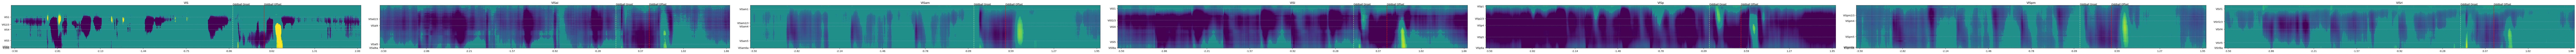

In [38]:
ssa_lfps.plot(vmin=-1e-4, vmax=1e-4, figure="mice_passiveglo_visual_ssacontrast_lfp.pdf", **events)

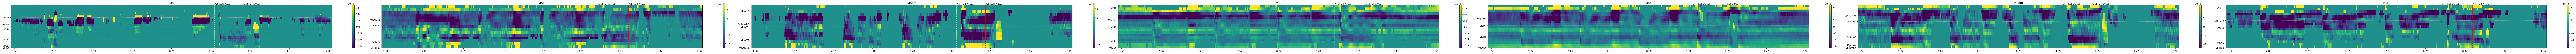

In [39]:
ssa_csd.plot(figure="mice_passiveglo_visual_ssacontrast_csd.pdf", **events)